In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

import matplotlib
%matplotlib inline 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('cat_in_dat/train.csv')

In [3]:
train.shape

(600000, 25)

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [6]:
train['ord_5'].nunique()

190

In [7]:
train['ord_5'].value_counts()

Fl    10562
DN     9527
Sz     8654
RV     5648
oJ     5596
PS     5447
vq     5443
WW     5385
XC     5383
AG     5364
GZ     5348
be     5313
DR     5292
vx     5237
tn     5231
lS     5229
hG     5224
mo     5174
Ib     5129
mD     5120
TL     5112
TZ     5092
Hk     5033
Nh     4986
YJ     4968
rl     4961
RD     4949
gc     4926
uQ     4923
pB     4852
Mg     4831
MV     4826
rM     4792
oU     4753
rA     4738
JQ     4717
Dj     4686
DI     4682
UV     4654
yE     4623
fV     4582
ep     4572
Pw     4568
OZ     4565
XM     4554
Ey     4520
oh     4512
ly     4489
AU     4487
NS     4475
sf     4458
rg     4437
sc     4427
wa     4417
qP     4362
Bx     4349
kT     4348
pE     4293
xG     4290
dh     4288
US     4281
DT     4224
hT     4210
jf     4193
th     4150
qN     4133
EC     4103
nj     4099
HK     4072
oI     3972
Pk     3954
aE     3954
hx     3931
IS     3930
XR     3888
nS     3792
LY     3790
mi     3712
AI     3677
Rz     3657
Lo     3633
nn     3630
Ji     3610
JT  

In [26]:
train['ord_5_0'] = train['ord_5'].apply(lambda x: x[0] if isinstance(x, str) else x)
train['ord_5_1'] = train['ord_5'].apply(lambda x: x[1] if isinstance(x, str) else x)
train['ord_5_0_upper'] = train['ord_5_0'].apply(lambda x: x.upper()==x if isinstance(x, str) else x)
train['ord_5_1_upper'] = train['ord_5_1'].apply(lambda x: x.upper()==x if isinstance(x, str) else x)

In [27]:
bin_col = [col for col in train.columns if col.startswith('bin_')]
nom_col = [col for col in train.columns if col.startswith('nom_')]
nom_col_low = [c for c in nom_col if len(train[c].unique()) <= 10]
nom_col_high = [c for c in nom_col if len(train[c].unique()) > 10]
ord_col = [col for col in train.columns if col.startswith('ord_')]

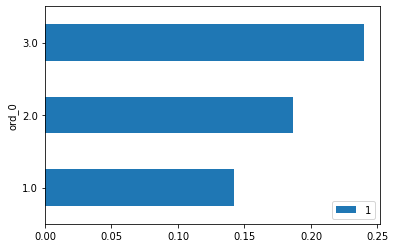

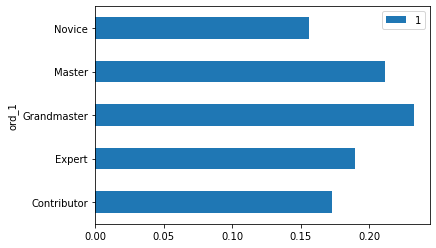

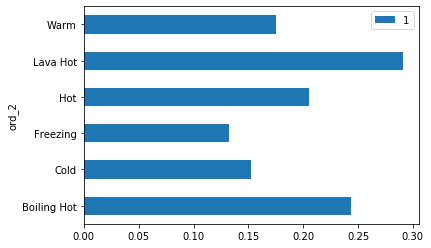

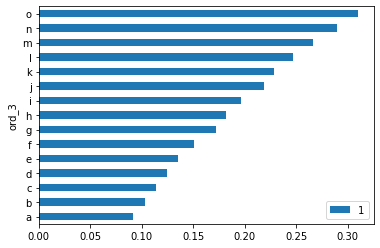

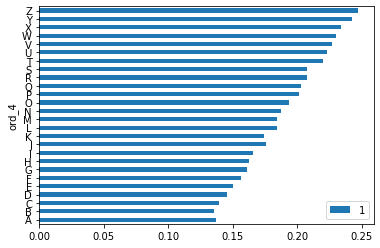

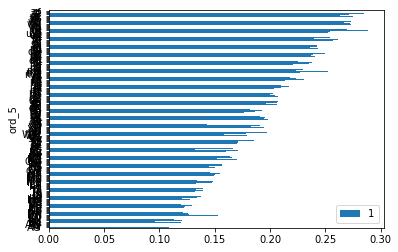

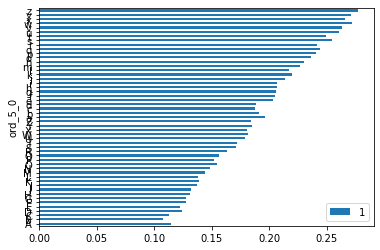

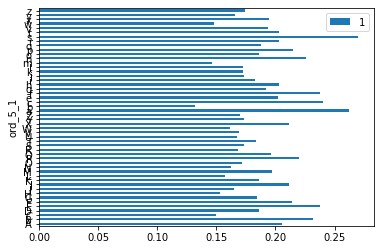

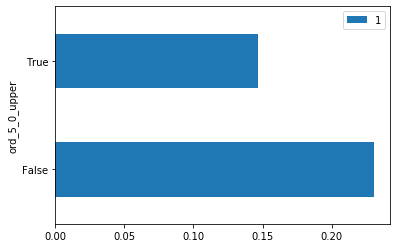

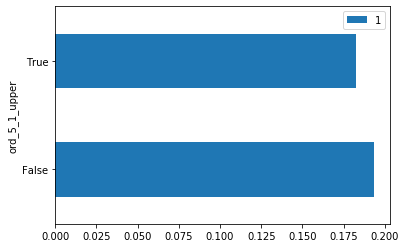

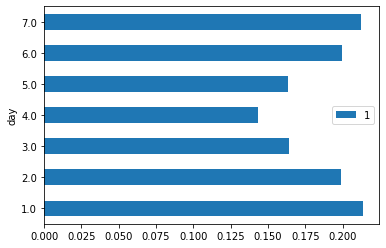

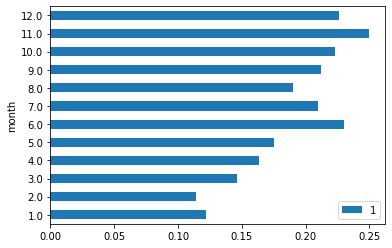

In [28]:
for col in ord_col + ['day', 'month']:
    pd.DataFrame(pd.crosstab(train[col], train.target, dropna=False, normalize='index')[1]).plot(kind='barh')